# Used Car Pricing Algorithm

In [6]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
train = pd.read_pickle(working_dir + "train.pkl")
validate = pd.read_pickle(working_dir + "validate.pkl")
test = pd.read_pickle(working_dir + "test.pkl")

## Model

### Column Inventory

#### HVF

In [54]:
# hvf columns
hvf_cols = [col for col in train.columns if col.startswith("hvf_")]
hvf_cols.remove("hvf_opt_missing")
hvf_cols.remove("hvf_std_missing")
hvf_cols.remove("hvf_optional")
hvf_cols.remove("hvf_standard")
hvf_cols

['hvf_opt_comp_0',
 'hvf_opt_comp_1',
 'hvf_opt_comp_2',
 'hvf_opt_comp_3',
 'hvf_opt_comp_4',
 'hvf_opt_comp_5',
 'hvf_opt_comp_6',
 'hvf_opt_comp_7',
 'hvf_opt_comp_8',
 'hvf_all_comp_0',
 'hvf_all_comp_1',
 'hvf_all_comp_2',
 'hvf_all_comp_3',
 'hvf_all_comp_4',
 'hvf_all_comp_5',
 'hvf_all_comp_6',
 'hvf_all_comp_7',
 'hvf_all_comp_8']

#### Numeric

In [55]:
# numeric columns
num_cols = train.select_dtypes(include=["number"]).columns.tolist()
num_cols.sort()
num_cols.remove("mvr_price")
for hvf_col in hvf_cols:
    num_cols.remove(hvf_col)
num_cols

['age_months',
 'consumer_sentiment_index',
 'cylinders',
 'doors',
 'engine_size',
 'gas_price_index',
 'hvf_opt_missing',
 'hvf_std_missing',
 'is_certified',
 'make_model_encode',
 'make_model_trim_encode',
 'median_home_value',
 'median_income',
 'monthly_mileage',
 'mpg',
 'mvr_mileage',
 'mvr_model_year',
 'mvr_price_bc',
 'new_car_price_index',
 'population_density',
 'used_car_price_index']

In [56]:
# categorical columns
cat_cols = list(train.columns)

# remove num cols
for num_col in num_cols:
    cat_cols.remove(num_col)
    
# remove hvf cols
for hvf_col in hvf_cols:
    cat_cols.remove(hvf_col)

# remove selected other cols
other_cols = ["hvf_optional","hvf_standard","mvr_purchase_date","mvr_purchase_yearmonth","zip"]
for other_col in other_cols:
    cat_cols.remove(other_col)

# remove target and cleanup
cat_cols.remove("mvr_price")
cat_cols.sort()
cat_cols

['base_exterior_color',
 'base_interior_color',
 'body_subtype',
 'body_type',
 'drivetrain',
 'engine_block',
 'fuel_type',
 'make',
 'model',
 'mvr_purchase_month',
 'mvr_state',
 'transmission',
 'trim',
 'vehicle_type']

In [57]:
# target
target = "mvr_price"

### Feature Prep

In [7]:
train[num_cols].sample(5).T

,5641706,746779,2789002,4146870,2645290
age_months,31.000000,79.000000,27.000000,51.000000,42.000000
consumer_sentiment_index,96.800000,96.800000,96.200000,58.200000,67.400000
cylinders,6.000000,6.000000,6.000000,8.000000,4.000000
doors,5.000000,5.000000,4.000000,4.000000,4.000000
engine_size,3.600000,3.600000,3.600000,5.600000,2.500000
gas_price_index,2.597750,2.597750,2.835750,3.975000,3.394800
hvf_opt_missing,1.000000,1.000000,1.000000,1.000000,1.000000
hvf_std_missing,0.000000,0.000000,1.000000,0.000000,0.000000
is_certified,0.000000,0.000000,0.000000,0.000000,0.000000
make_model_encode,26526.765625,27208.826172,16777.140625,31075.593750,16777.140625


### Linear

In [13]:
from sklearn.linear_model import LinearRegression

In [ ]:
# box-cox transform mvr_price
from scipy.stats import boxcox
from scipy.special import inv_boxcox

shift = 0

# calculate on the training set
train["mvr_price_bc"], lambda_bc = boxcox(train["mvr_price"] + shift)

# apply validation and test sets
validate["mvr_price_bc"] = boxcox(validate["mvr_price"] + shift, lambda_bc)
test["mvr_price_bc"] = boxcox(test["mvr_price"] + shift, lambda_bc)

<AxesSubplot:>

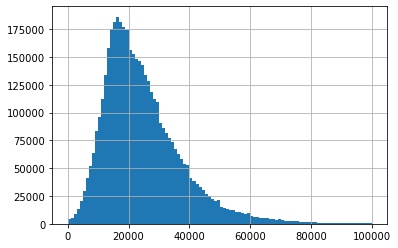

In [15]:
train["mvr_price"].hist(bins=100)

<AxesSubplot:>

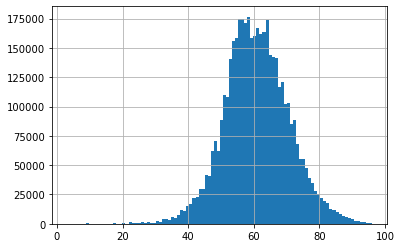

In [16]:
train["mvr_price_bc"].hist(bins=100)

In [17]:
# scale numeric columns
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# fit
#scaler.fit(train[num_cols])

# transform
#train[num_cols] = scaler.transform(train[num_cols])
#validate[num_cols] = scaler.transform(validate[num_cols])
#test[num_cols] = scaler.transform(test[num_cols])


In [18]:
# correlation coefficients
corr_coef = train.corr(numeric_only=True)["mvr_price_bc"].abs().sort_values(ascending=False)
cor_picks = corr_coef[corr_coef > 0.2].index.tolist()
cor_picks

['mvr_price_bc',
 'mvr_price',
 'make_model_trim_encode',
 'make_model_encode',
 'mvr_model_year',
 'hvf_all_comp_0',
 'age_months',
 'engine_size',
 'cylinders',
 'mvr_mileage',
 'mpg',
 'hvf_opt_missing',
 'used_car_price_index',
 'new_car_price_index',
 'gas_price_index',
 'consumer_sentiment_index',
 'hvf_all_comp_2']

In [19]:
selected_num_cols = ['age_months',
                     'consumer_sentiment_index',
                     'cylinders',
                     'engine_size',
                     'gas_price_index',
                     
                     #'make_model_trim_encode',
                     #'hvf_opt_comp_0',
                     #'hvf_opt_comp_1',
                     #'hvf_opt_comp_2',
                     #'hvf_std_missing',
                     
                     'make_model_encode',
                     'hvf_all_comp_0',
                     'hvf_all_comp_1',
                     'hvf_all_comp_2',
                     'hvf_opt_missing',
                     
                     'mpg',
                     'mvr_mileage',
                     'mvr_model_year',
                     'new_car_price_index',
                     'used_car_price_index',
                     'median_income']

In [20]:
# fit
lr_model = LinearRegression()
lr_model.fit(train[selected_num_cols], train["mvr_price_bc"])

# predict
lr_preds = lr_model.predict(validate[selected_num_cols])
lr_preds_s = pd.Series(lr_preds)

# results
assess_results(validate.reset_index(drop=True).loc[(pd.Series(lr_preds) > 0.1),"mvr_price"]
               , inv_boxcox(lr_preds_s[lr_preds_s > 0.1], lambda_bc))



R2:  0.842
MAE:  3511.4
MAPE:  19.6 %
RMSE:  5121.91
Percent Underpayed:  53.2 %
Mean of Underpayment:  3986.23
Percent Overpayed:  46.8 %
Mean of Overpayment:  -2972.08
Mean Error:  728.35


### CatBoost

In [58]:
from catboost import CatBoostRegressor

In [59]:
train.columns

Index(['mvr_price', 'make', 'model', 'trim', 'mvr_model_year', 'mvr_mileage',
       'age_months', 'vehicle_type', 'body_type', 'body_subtype', 'drivetrain',
       'fuel_type', 'engine_block', 'engine_size', 'transmission', 'doors',
       'cylinders', 'base_exterior_color', 'base_interior_color',
       'is_certified', 'zip', 'mvr_state', 'hvf_standard', 'hvf_optional',
       'mvr_purchase_date', 'make_model_encode', 'make_model_trim_encode',
       'mvr_purchase_month', 'monthly_mileage', 'mpg', 'population_density',
       'median_income', 'median_home_value', 'mvr_purchase_yearmonth',
       'used_car_price_index', 'new_car_price_index', 'gas_price_index',
       'consumer_sentiment_index', 'hvf_opt_missing', 'hvf_std_missing',
       'hvf_opt_comp_0', 'hvf_opt_comp_1', 'hvf_opt_comp_2', 'hvf_opt_comp_3',
       'hvf_opt_comp_4', 'hvf_opt_comp_5', 'hvf_opt_comp_6', 'hvf_opt_comp_7',
       'hvf_opt_comp_8', 'hvf_all_comp_0', 'hvf_all_comp_1', 'hvf_all_comp_2',
       'hvf_all_com

In [61]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     'make_model_trim_encode',
                     'hvf_opt_comp_0',
                     'hvf_opt_comp_1',
                     'hvf_opt_comp_2',
                     'hvf_opt_comp_3',
                     'hvf_opt_comp_4',
                     'hvf_opt_comp_5',
                     'hvf_opt_comp_6',
                     'hvf_opt_comp_7',
                     'hvf_opt_comp_8',
                     'hvf_std_missing',
                     'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                     'used_car_price_index',
                     'consumer_sentiment_index',
                     'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

In [32]:
# init model
cb_model = CatBoostRegressor(cat_features=selected_cat_cols
                             ,verbose=False
                             ,task_type="GPU"
                             ,devices="0:3"
                            ,per_float_feature_quantization=gf_index+':border_count=1024'
                            )

# fit
cb_model.fit(train[selected_num_cols + selected_cat_cols]
             ,train[target]
             ,eval_set=(validate[selected_num_cols + selected_cat_cols], validate[target])
            )

In [33]:
# predict
cb_preds = cb_model.predict(validate[selected_num_cols + selected_cat_cols])

In [34]:
# results
assess_results(validate[target], cb_preds)

R2:  0.878
MAE:  3121.41
MAPE:  17.8 %
RMSE:  4514.6
Percent Underpayed:  58.2 %
Mean of Underpayment:  3611.44
Percent Overpayed:  41.8 %
Mean of Overpayment:  -2438.54
Mean Error:  1083.83


In [ ]:
# print top ten features by importance with importance measure
importance = cb_model.get_feature_importance(prettified=True)
importance.head(15)

### CatBoost Hyperparameter Tuning
https://catboost.ai/en/docs/concepts/parameter-tuning

https://catboost.ai/en/docs/references/training-parameters/common

In [43]:
# golden feature
# selected as a highly predictive feature for more splitting
gf_index = (selected_num_cols + selected_cat_cols).index('make_model_trim_encode')
gf_index = str(gf_index)

In [ ]:
# define hyperparameters to search over
param_grid = {
            'learning_rate': [0.1, 0.2, 0.3, 0.4]
            ,'iterations': [1000,1500,2000] # number of trees
            ,'depth': [2,6,10] # tree depth
            #,'l2_leaf_reg': [1, 3] # L2 regularization coefficient of the cost function
            #,'random_strength': [1, 3, 5] # amount of randomness to use for scoring splits
            ,'bagging_temperature' : [0,1,8] # bagging aggressiveness [0,inf)
            #,'border_count': [128,254] # number of splits for numerical features
            }

# init model
cb_model = CatBoostRegressor(cat_features=selected_cat_cols
                             ,task_type="GPU"
                             ,devices="0:3"
                             ,iterations=1
                             ,border_count=254
                             ,per_float_feature_quantization=gf_index+':border_count=1024'
                             ,verbose=False
                            )

grid_search_result = cb_model.grid_search(param_grid
                                       ,X=train[selected_num_cols + selected_cat_cols]
                                       ,y=train[target]
                                       ,cv=3
                                       ,verbose=False,
                                       #,plot=True
                                         )



In [ ]:
grid_search_result['params']

In [62]:
import pickle

In [ ]:
# save
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'grid_search_result.pickle', 'wb') as file:
    pickle.dump(grid_search_result, file)

In [63]:
# load
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'grid_search_result.pickle', 'rb') as file:
    grid_search_result = pickle.load(file)

In [65]:
hpt_params = grid_search_result['params']
hpt_params

{'bagging_temperature': 1,
 'depth': 10,
 'iterations': 2000,
 'learning_rate': 0.4}

In [66]:
# train the model with the best hyperparameters on the full training set
hpt_model = CatBoostRegressor(cat_features=selected_cat_cols
                             ,task_type="GPU"
                             ,devices="0:3"
                             ,border_count=254
                             ,per_float_feature_quantization=gf_index+':border_count=1024'
                             ,verbose=False
                              ,bagging_temperature=hpt_params["bagging_temperature"]
                              ,depth=hpt_params["depth"]
                              ,iterations=hpt_params["iterations"]
                              ,learning_rate=hpt_params["learning_rate"]
                            )

# fit
hpt_model.fit(train[selected_num_cols + selected_cat_cols]
             ,train[target]
             ,eval_set=(validate[selected_num_cols + selected_cat_cols], validate[target])
            )

In [136]:
# predict
hpt_preds = hpt_model.predict(validate[selected_num_cols + selected_cat_cols])

# results
assess_results(validate[target], hpt_preds)

R2:  0.894
MAE:  2837.78
MAPE:  16.8 %
RMSE:  4194.96
Percent Underpayed:  55.6 %
Mean of Underpayment:  3263.89
Percent Overpayed:  44.4 %
Mean of Overpayment:  -2304.39
Mean Error:  791.06


In [ ]:
print('Feature importances:', hpt_model.feature_importances_)

### Handicapped CatBoost

#### Without Target Encoding

In [68]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     #'make_model_trim_encode',
                     'hvf_opt_comp_0',
                     'hvf_opt_comp_1',
                     'hvf_opt_comp_2',
                     'hvf_opt_comp_3',
                     'hvf_opt_comp_4',
                     'hvf_opt_comp_5',
                     'hvf_opt_comp_6',
                     'hvf_opt_comp_7',
                     'hvf_opt_comp_8',
                     'hvf_std_missing',
                     'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                     'used_car_price_index',
                     'consumer_sentiment_index',
                     'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

In [69]:
# fit
cb_model = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False)
cb_model.fit(train[selected_num_cols + selected_cat_cols],train[target])

# predict
cb_preds = cb_model.predict(validate[selected_num_cols + selected_cat_cols])

# results
assess_results(validate[target], cb_preds)

R2:  0.69
MAE:  4748.74
MAPE:  23.2 %
RMSE:  7185.18
Percent Underpayed:  61.1 %
Mean of Underpayment:  5832.73
Percent Overpayed:  38.9 %
Mean of Overpayment:  -3048.32
Mean Error:  2375.27


#### Without External Data

In [70]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     'make_model_trim_encode',
                     'hvf_opt_comp_0',
                     'hvf_opt_comp_1',
                     'hvf_opt_comp_2',
                     'hvf_opt_comp_3',
                     'hvf_opt_comp_4',
                     'hvf_opt_comp_5',
                     'hvf_opt_comp_6',
                     'hvf_opt_comp_7',
                     'hvf_opt_comp_8',
                     'hvf_std_missing',
                     'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                    # 'used_car_price_index',
                    # 'consumer_sentiment_index',
                    # 'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

In [71]:
# fit
cb_model = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False)
cb_model.fit(train[selected_num_cols + selected_cat_cols],train[target])

# predict
cb_preds = cb_model.predict(validate[selected_num_cols + selected_cat_cols])

# results
assess_results(validate[target], cb_preds)

R2:  0.871
MAE:  3207.83
MAPE:  18.1 %
RMSE:  4638.71
Percent Underpayed:  58.7 %
Mean of Underpayment:  3713.27
Percent Overpayed:  41.3 %
Mean of Overpayment:  -2488.53
Mean Error:  1153.86


#### Without High Value Features

In [72]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     'make_model_trim_encode',
                    # 'hvf_opt_comp_0',
                    # 'hvf_opt_comp_1',
                    # 'hvf_opt_comp_2',
                    # 'hvf_opt_comp_3',
                    # 'hvf_opt_comp_4',
                    # 'hvf_opt_comp_5',
                    # 'hvf_opt_comp_6',
                    # 'hvf_opt_comp_7',
                    # 'hvf_opt_comp_8',
                    # 'hvf_std_missing',
                    # 'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                     'used_car_price_index',
                     'consumer_sentiment_index',
                     'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

In [73]:
# fit
cb_model = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False)
cb_model.fit(train[selected_num_cols + selected_cat_cols],train[target])

# predict
cb_preds = cb_model.predict(validate[selected_num_cols + selected_cat_cols])

# results
assess_results(validate[target], cb_preds)

R2:  0.876
MAE:  3115.54
MAPE:  17.7 %
RMSE:  4544.21
Percent Underpayed:  59.7 %
Mean of Underpayment:  3604.02
Percent Overpayed:  40.3 %
Mean of Overpayment:  -2392.96
Mean Error:  1185.17


## Tilted Loss
Allows targetting of quantiles

https://brendanhasz.github.io/2018/12/15/quantile-regression.html#quantile-regression

In [74]:
selected_num_cols = ['age_months',
                     'mvr_mileage',
                     'mvr_model_year',
                     'doors',
                     'cylinders',
                     'engine_size',
                     'mpg',
                     'make_model_trim_encode',
                     'hvf_opt_comp_0',
                     'hvf_opt_comp_1',
                     'hvf_opt_comp_2',
                     'hvf_opt_comp_3',
                     'hvf_opt_comp_4',
                     'hvf_opt_comp_5',
                     'hvf_opt_comp_6',
                     'hvf_opt_comp_7',
                     'hvf_opt_comp_8',
                     'hvf_std_missing',
                     'hvf_opt_missing',
                    # 'gas_price_index',
                    # 'new_car_price_index',
                     'used_car_price_index',
                     'consumer_sentiment_index',
                     'median_income',
                     'is_certified'
                    ]

selected_cat_cols = ['base_exterior_color',
                     'base_interior_color',
                     'body_type',
                     'drivetrain',
                     'engine_block',
                     'fuel_type',
                     'mvr_purchase_month',
                     'mvr_state',
                     'transmission',
                     'vehicle_type'
                    ]

In [75]:
# fit
cb_model_50 = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False
                            ,loss_function='Quantile:alpha=0.5')
cb_model_50.fit(train[selected_num_cols + selected_cat_cols],train[target])

In [ ]:
# fit
cb_model_30 = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False
                            ,loss_function='Quantile:alpha=0.3')
cb_model_30.fit(train[selected_num_cols + selected_cat_cols],train[target])

In [ ]:
# fit
cb_model_40 = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False
                            ,loss_function='Quantile:alpha=0.4')
cb_model_40.fit(train[selected_num_cols + selected_cat_cols],train[target])

In [ ]:
# fit
cb_model_60 = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False
                            ,loss_function='Quantile:alpha=0.6')
cb_model_60.fit(train[selected_num_cols + selected_cat_cols],train[target])

In [ ]:
# fit
cb_model_70 = CatBoostRegressor(cat_features=selected_cat_cols,verbose=False
                            ,loss_function='Quantile:alpha=0.7')
cb_model_70.fit(train[selected_num_cols + selected_cat_cols],train[target])

## Save Models

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'hpt_model.pickle', 'wb') as file:
    pickle.dump(hpt_model, file)

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_30.pickle', 'wb') as file:
    pickle.dump(cb_model_30, file)

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_40.pickle', 'wb') as file:
    pickle.dump(cb_model_40, file)

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_50.pickle', 'wb') as file:
    pickle.dump(cb_model_50, file)

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_60.pickle', 'wb') as file:
    pickle.dump(cb_model_60, file)

In [ ]:
working_dir = "/data/p_dsi/capstone_projects/shea/working/"
with open(working_dir + 'cb_model_70.pickle', 'wb') as file:
    pickle.dump(cb_model_70, file)